 Please upload your preprocessed CSV file (file picker will appear).


Saving preprocessed_dataset.csv to preprocessed_dataset (7).csv
 Uploaded: preprocessed_dataset (7).csv
 Data loaded successfully!
   Rainfall  Temperature   Humidity   Wind Speed   Solar Radiation   Soil pH  \
0 -0.423564      0.277946   0.773118     0.542455        -1.768779  0.755863   
1  1.560981      1.089653   0.658097    -1.434487        -1.782970 -1.132208   
2  0.807632      0.932235  -1.404611    -0.875777        -0.138010 -0.571042   
3  0.348378     -1.175861   1.478569     0.953397        -1.682016  0.524936   
4 -1.176228     -1.192032   0.243794     0.110005         1.612688 -0.102215   

   Soil Moisture   Organic Matter Content   Nitrogen   Phosphorus   \
0        0.664637                 0.869985  -1.634126     1.446573   
1       -0.096254                -0.812241  -1.699246     1.562935   
2       -1.534075                 0.551021  -0.945502    -1.710477   
3        1.477979                 0.707674   1.056958    -0.628348   
4        1.693790                -0.52

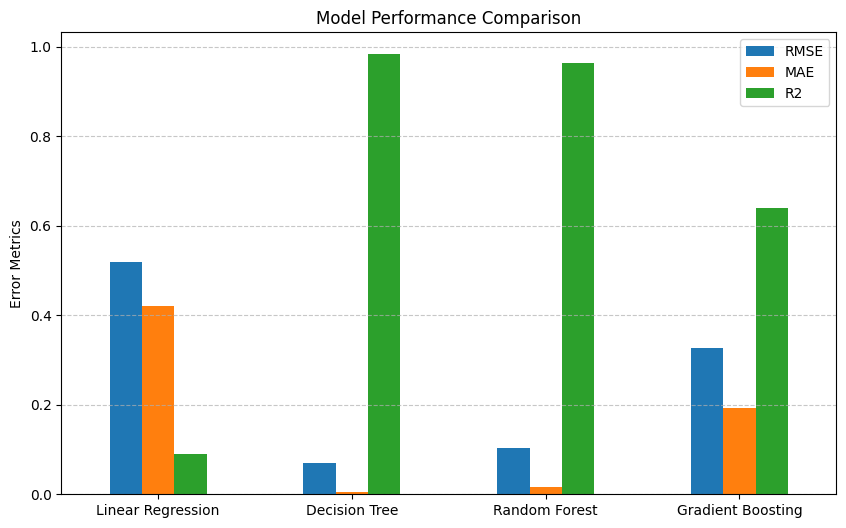


 Best Model: Decision Tree
✅ Model and scaler saved successfully as 'best_model.pkl' and 'scaler.pkl'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
# ===============================================
# 🌾 Crop Yield Prediction - Model Training Script
# ===============================================

from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import joblib

print(" Please upload your preprocessed CSV file (file picker will appear).")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print(f" Uploaded: {filename}")

# Load dataset
df = pd.read_csv(filename)
print(" Data loaded successfully!")
print(df.head())

# -----------------------------------------------
# Data Cleaning (Ensure categorical columns encoded)
# -----------------------------------------------
if df["Crop Type"].dtype == 'object' or df["Tillage Practice"].dtype == 'object':
    df["Tillage Practice"] = df["Tillage Practice"].str.strip().str.lower().map({
        "conventional": 0,
        "no till": 1,
        "strip till": 2
    })

    df["Crop Type"] = df["Crop Type"].str.strip().str.lower().map({
        "cassava": 0,
        "maize": 1,
        "rice": 2,
        "soyabean": 3,
        "yam": 4
    })

df.dropna(inplace=True)
print("After encoding and dropping NaN values:")
print(df.isnull().sum())

# -----------------------------------------------
# Feature Selection
# -----------------------------------------------
X = df.drop(columns=["Crop Yield"])
y = df["Crop Yield"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------------------------
# Model Training
# -----------------------------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "MAE": mae, "R2": r2}
    print(f"\n {name} Results:")
    print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

# -----------------------------------------------
# Model Comparison Graph
# -----------------------------------------------
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Error Metrics")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# -----------------------------------------------
# Save Best Model
# -----------------------------------------------
best_model_name = results_df["R2"].idxmax()
best_model = models[best_model_name]
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print(f"\n Best Model: {best_model_name}")
print("✅ Model and scaler saved successfully as 'best_model.pkl' and 'scaler.pkl'.")

# Download models
files.download("best_model.pkl")
files.download("scaler.pkl")
